In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train Data

In [92]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [93]:
pd.set_option('display.max_columns', None)

In [94]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [95]:
train_data.shape

(10683, 11)

In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [97]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
33h 20m      1
47h 40m      1
42h 45m      1
29h 30m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

In [98]:
train_data.dropna(inplace=True)

In [99]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [100]:
train_data['Journey_Day'] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data['Journey_Month']= pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month

#extracting hours
train_data['Dep_hour']= pd.to_datetime(train_data['Dep_Time']).dt.hour
#extracting minutes
train_data['Dep_min']= pd.to_datetime(train_data['Dep_Time']).dt.minute

#Extracting hours
train_data['Arrival_hour']= pd.to_datetime(train_data.Arrival_Time).dt.hour
#Extracting minutes
train_data['Arrival_min']= pd.to_datetime(train_data.Arrival_Time).dt.minute



# Assigning and converting Duration column to list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:     # To check if the duration contains only hours and minutes
        if "h" in duration[i]:
            duration[i]= duration[i].strip()+ " 0m"    # Adds 0 minute
        else:
            duration[i]= "0h "  + duration[i]           # Adds 0 hour
            
duration_hours= []
duration_mins= []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))     # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))      # Extract minutes from duration
    

train_data['Duration_hours'] = duration_hours
train_data['Durations_mins'] = duration_mins    

In [101]:
train_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time',"Duration"],axis=1 , inplace=True)

In [102]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Durations_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [103]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

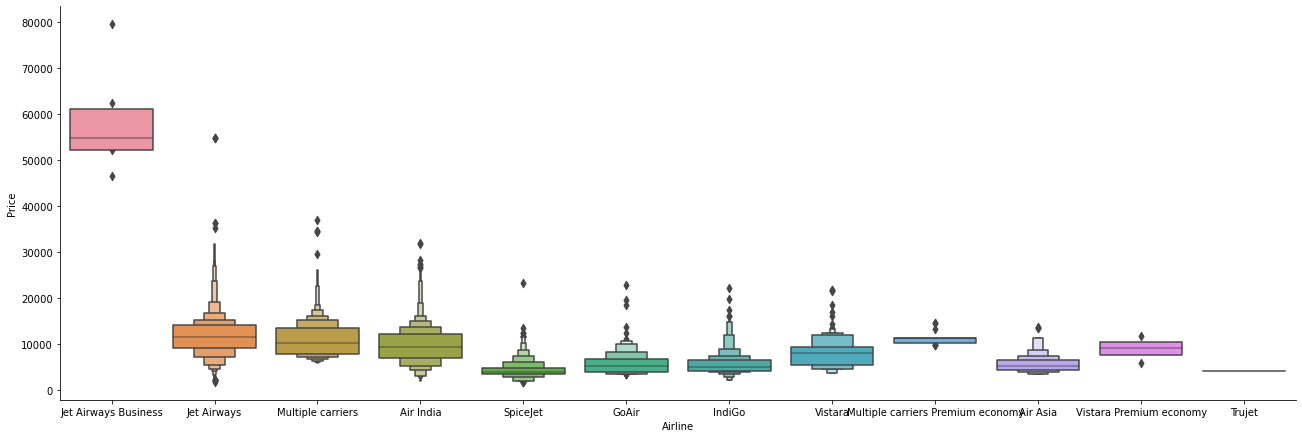

In [104]:
sns.catplot(y= 'Price', x= 'Airline',data=train_data.sort_values('Price',ascending= False), kind='boxen', height= 6 , aspect=3)

In [105]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)

In [106]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [107]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

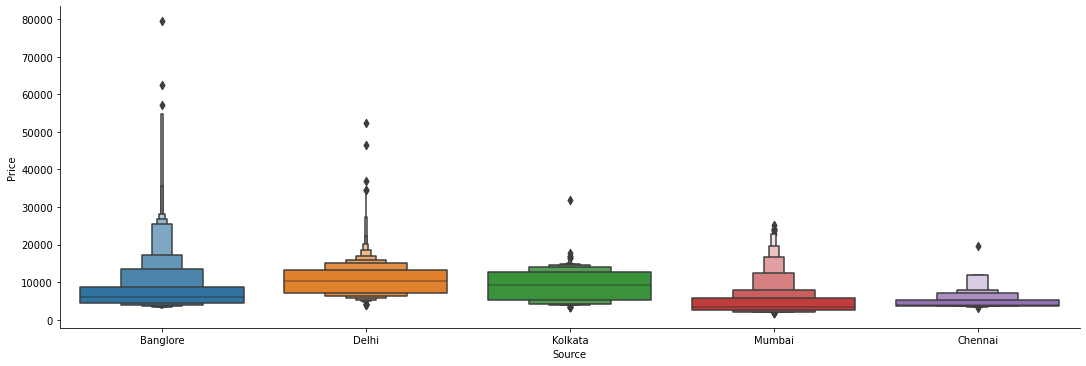

In [108]:
sns.catplot(y= 'Price', x= 'Source', data= train_data.sort_values('Price', ascending= False), kind='boxen', height=5, aspect=3)

In [109]:
Source= train_data['Source']
Source= pd.get_dummies(Source, drop_first= True)

In [110]:
Source.head(10)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,1,0,0


In [111]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

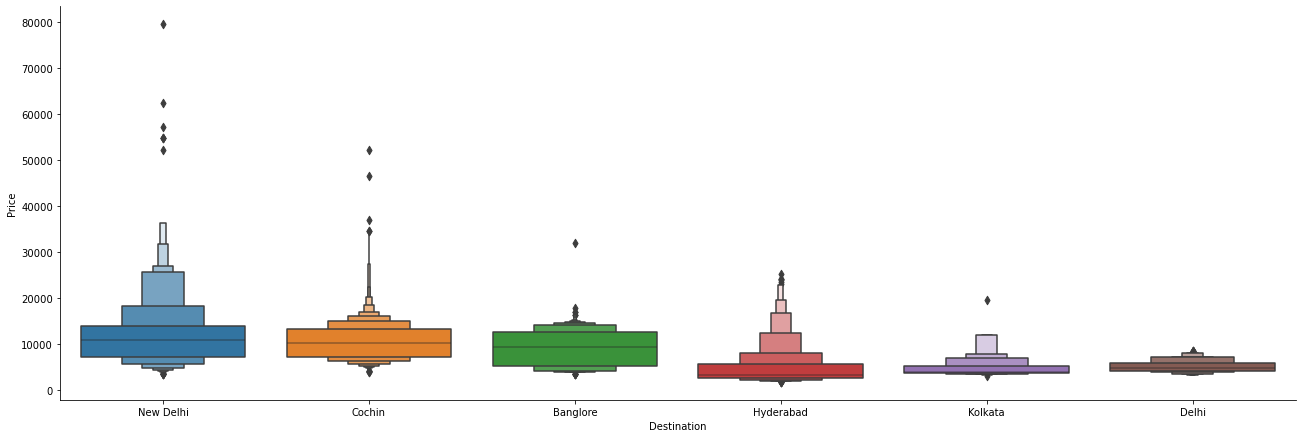

In [112]:
sns.catplot(y= 'Price',x='Destination',data=train_data.sort_values('Price', ascending= False), kind='boxen', height=6, aspect=3)

In [113]:
Destination= train_data['Destination']
Destination= pd.get_dummies(Destination,drop_first=True)

In [114]:
Destination.head(10)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


In [115]:
train_data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BLR → CCU → BBI → HYD       1
BOM → NDC → HYD                   1
CCU → IXA → BLR                   1
CCU → VTZ → BLR                   1
BOM → JAI → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [116]:
train_data.drop (['Route', 'Additional_Info'], axis=1, inplace= True)

In [117]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Durations_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [118]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [119]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace= True)

In [120]:
train_data.head(10)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Durations_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,11,25,19,15,7,50


In [121]:
train_data['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [122]:
data_train= pd.concat([train_data, Airline, Source, Destination,], axis= 1)

In [123]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Durations_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [124]:
data_train.shape

(10682, 33)

In [125]:
data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace= True)

In [126]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Durations_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [127]:
 data_train.shape

(10682, 30)

# Test Data

In [128]:
test_data= pd.read_excel(r'Test_set.xlsx')

In [129]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [130]:
test_data['Journey_Day']= pd.to_datetime(test_data.Date_of_Journey , format='%d/%m/%Y').dt.day
test_data['Journey_Month']= pd.to_datetime(test_data.Date_of_Journey, format= '%d/%m/%Y').dt.month

test_data['Dep_Hour']= pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data["Dep_Min"]= pd.to_datetime(test_data['Dep_Time']).dt.minute

test_data['Arrival_Hour']= pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_Min']= pd.to_datetime(test_data['Arrival_Time']).dt.minute


# Assigning and converting Duration column to list
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:     # To check if the duration contains only hours and minutes
        if "h" in duration[i]:
            duration[i]= duration[i].strip()+ " 0m"    # Adds 0 minute
        else:
            duration[i]= "0h "  + duration[i]           # Adds 0 hour
            
duration_hours= []
duration_mins= []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))     # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))      # Extract minutes from duration
    

test_data['Duration_hours'] = duration_hours
test_data['Durations_mins'] = duration_mins    

In [131]:
test_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], axis=1, inplace=True)

In [132]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Durations_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [133]:
Airline= test_data[['Airline']]
Airline= pd.get_dummies(Airline)

Source= test_data[['Source']]
Source= pd.get_dummies(Source)

Destination= test_data[['Destination']]
Destination= pd.get_dummies(Destination)

In [134]:
test_data.drop(['Airline','Source','Destination'], axis=1, inplace= True)

In [135]:
test_data.head()

,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Durations_mins
0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [136]:
test_data.drop(['Route','Additional_Info'], axis=1, inplace=True)

In [137]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Durations_mins
0,1 stop,6,6,17,30,4,25,10,55
1,1 stop,12,5,6,20,10,20,4,0
2,1 stop,21,5,19,15,19,0,23,45
3,1 stop,21,5,8,0,21,0,13,0
4,non-stop,24,6,23,55,2,45,2,50


In [138]:
test_data['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [139]:
test_data.replace({'non-stop' :0, '1 stop' :1, '2 stops' :2, '3 stops' :3, '4 stops' :4}, inplace= True)

In [140]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Durations_mins
0,1,6,6,17,30,4,25,10,55
1,1,12,5,6,20,10,20,4,0
2,1,21,5,19,15,19,0,23,45
3,1,21,5,8,0,21,0,13,0
4,0,24,6,23,55,2,45,2,50


In [141]:
data_test= pd.concat([test_data, Airline, Source, Destination], axis=1)

In [142]:
data_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Durations_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [143]:
data_train.shape

(10682, 30)

In [144]:
data_test.shape

(2671, 31)

# Building Predictive Model

In [145]:
y= data_train['Price']
x= data_train.drop(['Price'], axis=1)

In [146]:
y.shape

(10682,)

In [147]:
x.shape

(10682, 29)

In [148]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [149]:
x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Durations_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [152]:
x_train.shape

(8545, 29)

In [153]:
x_test.shape

(2137, 29)

In [154]:
y_train.shape

(8545,)

In [155]:
y_test.shape

(2137,)

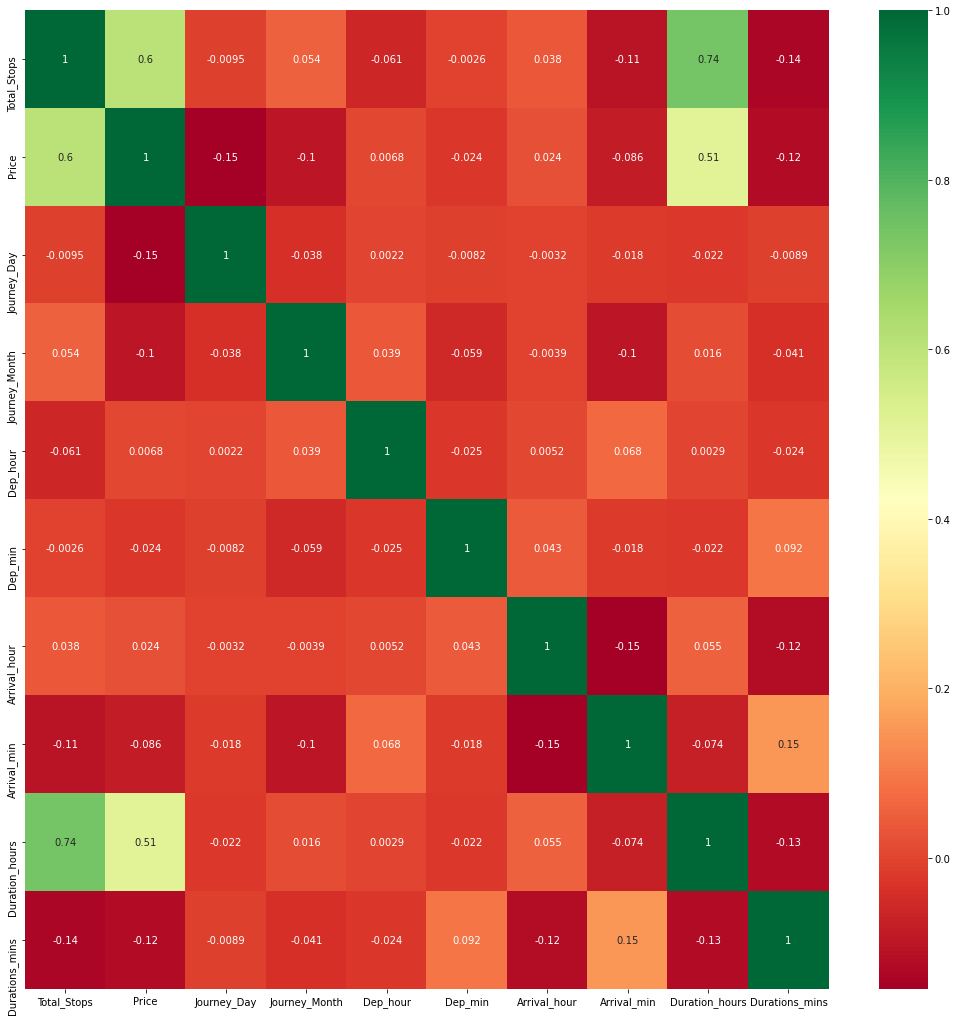

In [156]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [157]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [158]:
print(selection.feature_importances_)

[2.27722428e-01 1.45085060e-01 5.29454861e-02 2.39913453e-02
 2.07977292e-02 2.81315962e-02 1.97090477e-02 1.20376374e-01
 1.72264708e-02 8.88474848e-03 1.80467518e-03 1.61912056e-02
 1.40027580e-01 6.73980874e-02 2.03491121e-02 8.19245593e-04
 3.00178433e-03 1.27346178e-04 5.24637716e-03 7.97524714e-05
 4.56482725e-04 7.57493164e-03 3.16460570e-03 6.53689591e-03
 9.21330927e-03 1.88502401e-02 9.04419499e-03 5.36152685e-04
 2.47077358e-02]


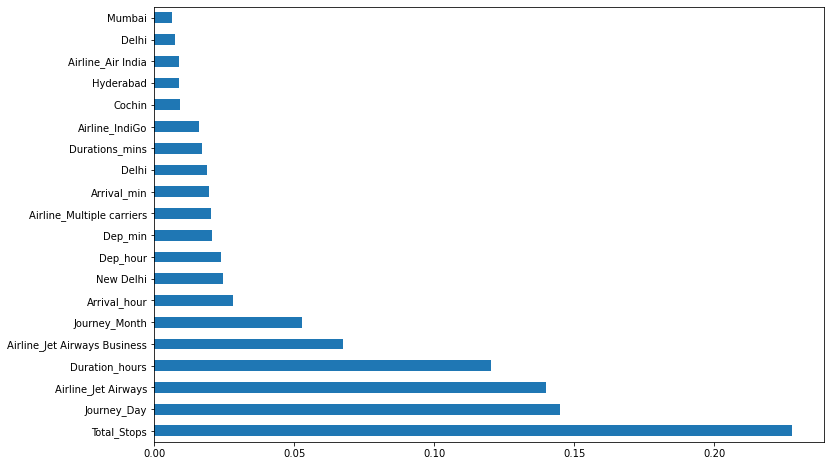

In [159]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Random Forest Regressor

In [160]:
from sklearn.ensemble import RandomForestRegressor
reg_rf= RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [161]:
y_pred= reg_rf.predict(x_test)

In [162]:
reg_rf.score(x_train, y_train)

0.9540033875543

In [163]:
reg_rf.score(x_test, y_test)

0.7980130473442227

C:\Users\otheruser\Anaconda_Jupyter\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

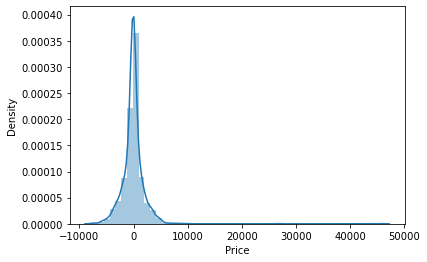

In [164]:
sns.distplot(y_test-y_pred)

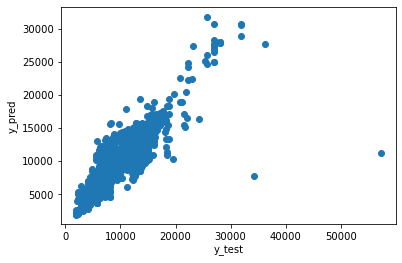

In [165]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


In [166]:
from sklearn import metrics

In [167]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1171.8058042400457
MSE: 4355254.049909669
RMSE: 2086.9245434154222


# HyperParameter Tuning

In [168]:
from sklearn.model_selection import RandomizedSearchCV

In [169]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [170]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [171]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [172]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [173]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [174]:
prediction= rf_random.predict(x_test)

C:\Users\otheruser\Anaconda_Jupyter\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


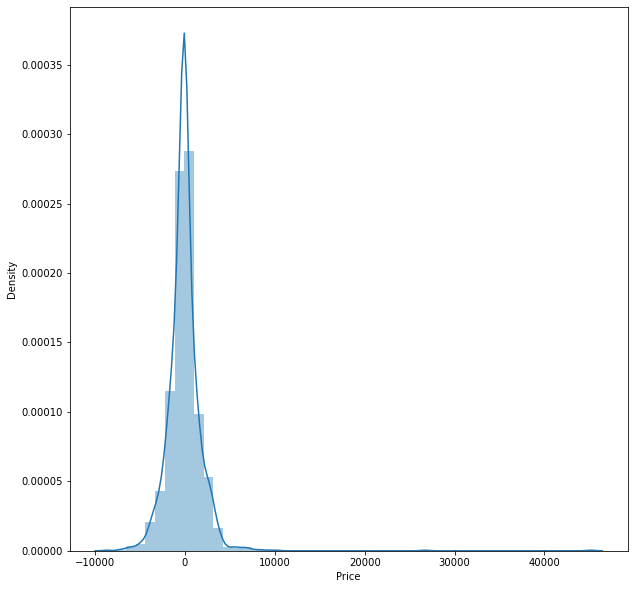

In [175]:
plt.figure(figsize = (10,10))
sns.distplot(y_test-prediction)
plt.show()

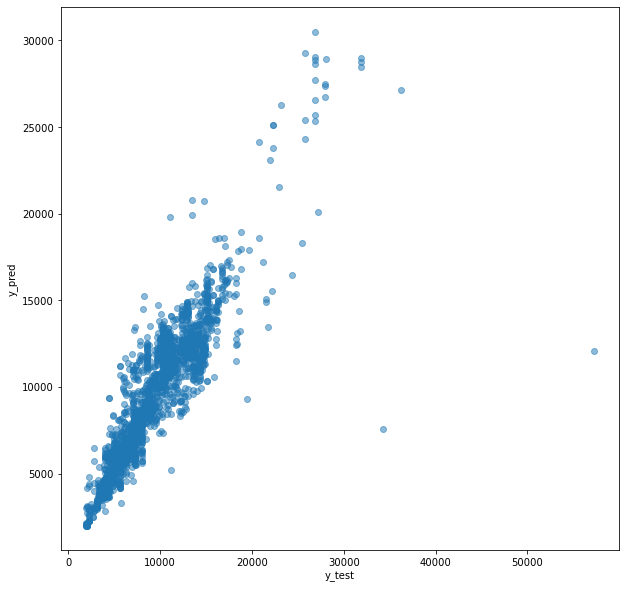

In [176]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [177]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1168.74989435864
MSE: 4066239.9421680034
RMSE: 2016.4919891157524
